In [73]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import random
from matplotlib import pyplot as plt

random.seed(1618)
np.random.seed(1618)
tf.set_random_seed(1618)

tf.logging.set_verbosity(tf.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

#ALGORITHM = "guesser"
ALGORITHM = "tf_net"
#ALGORITHM = "tf_conv"

DATASET = "mnist_d"
#DATASET = "mnist_f"

#DATASET = "cifar_10"
#DATASET = "cifar_100_c"
#DATASET = "cifar_100_f"



if DATASET == "mnist_d":
    NUM_CLASSES = 10
    IH = 28
    IW = 28
    IZ = 1
    IS = 784
elif DATASET == "mnist_f":
    print("hi")
    NUM_CLASSES = 10
    IH = 28
    IW = 28
    IZ = 1
    IS = 784
elif DATASET == "cifar_10":
    NUM_CLASSES = 10
    IH = 32
    IW = 32
    IZ = 3
    IS = 3072
    
elif DATASET == "cifar_100_f":
    NUM_CLASSES = 100
    IH = 32
    IW = 32
    IZ = 3
    IS = 3072
elif DATASET == "cifar_100_c":
    NUM_CLASSES = 100
    IH = 32
    IW = 32
    IZ = 3
    IS = 3072

else:
    raise ValueError("Dataset not recognized.")
#=========================<Classifier Functions>================================

def guesserClassifier(xTest):
    ans = []
    for entry in xTest:
        pred = [0] * NUM_CLASSES
        pred[random.randint(0, 9)] = 1
        ans.append(pred)
    return np.array(ans)


def buildTFNeuralNet(x, y, eps = 6):
            #TODO: Implement a standard ANN here.
    model = tf.keras.Sequential()
    lossType = tf.keras.losses.categorical_crossentropy
    opt = tf.train.AdamOptimizer()
    
    i_shape = (IS,)
    model.add(tf.keras.layers.Dense(512, input_shape = i_shape, activation = tf.nn.relu))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(512,activation = tf.nn.relu))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(NUM_CLASSES,activation = tf.nn.softmax))
    model.compile(optimizer = opt, loss = lossType)
    model.fit(x,y,batch_size = 128, epochs = eps)
    
    model_json = model.to_json()
    if DATASET == "mnist_d":
        with open("ann_model.json","w") as json_file:
            json_file.write(model_json)
            model.save_weights("ann_model.h5")
            print("Saved model to disk!!")
    elif DATASET == "mnist_f":
        with open("ann_model_f.json","w") as json_file:
            json_file.write(model_json)
            model.save_weights("ann_model_f.h5")
            print("Saved model_f to disk!!")
    elif DATASET == "cifar_10":
        with open("ann_model_10.json","w") as json_file:
            json_file.write(model_json)
            model.save_weights("ann_model_10.h5")
            print("Saved model_10 to disk!!")
    elif DATASET == "cifar_100_f":
        with open("ann_model_100_f.json","w") as json_file:
            json_file.write(model_json)
            model.save_weights("ann_model_100_f.h5")
            print("Saved model_100_f to disk!!")
    elif DATASET == "cifar_100_c":
        with open("ann_model_100_c.json","w") as json_file:
            json_file.write(model_json)
            model.save_weights("ann_model_100_c.h5")
            print("Saved model_100_c to disk!!")
    else:
        raise ValueError("Dataset not recognized.")  
    
    return model


def buildTFConvNet(x, y, eps = 10, dropout = True, dropRate = 0.2):
    #TODO: Implement a CNN here. dropout option is required.
    model = tf.keras.Sequential()
    lossType = tf.keras.losses.categorical_crossentropy
    opt = tf.train.AdamOptimizer()
    i_shape = (IH,IW,IZ)
    #add CNN layers
    model.add(tf.keras.layers.Conv2D(32,kernel_size = 3,padding = "same",activation = tf.nn.relu, input_shape = i_shape))
    model.add(tf.keras.layers.Conv2D(32,kernel_size = 3,padding = "same", activation = tf.nn.relu))
    model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
    model.add(tf.keras.layers.Dropout(dropRate))
    
    
    model.add(tf.keras.layers.Conv2D(64,kernel_size = 3,padding = "same",activation = tf.nn.relu))
    model.add(tf.keras.layers.Conv2D(64,kernel_size = 3,padding = "same",activation = tf.nn.relu))
    model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
    model.add(tf.keras.layers.Dropout(dropRate))
    
    
    model.add(tf.keras.layers.Conv2D(128,kernel_size = 3,padding = "same",activation = tf.nn.relu))
    model.add(tf.keras.layers.Conv2D(128,kernel_size = 3,padding = "same",activation = tf.nn.relu))
    model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
    model.add(tf.keras.layers.Dropout(dropRate))
    
    
    
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(dropRate))
    model.add(tf.keras.layers.Dense(512,activation = tf.nn.relu))
    model.add(tf.keras.layers.Dropout(dropRate))
    model.add(tf.keras.layers.Dense(NUM_CLASSES,activation = tf.nn.softmax))
    model.compile(optimizer = opt, loss = lossType)
    model.fit(x,y,batch_size = 128, epochs = eps)
    
    model_json = model.to_json()
    
    
    if DATASET == "mnist_d":
        with open("model.json","w") as json_file:
            json_file.write(model_json)
            model.save_weights("model.h5")
            print("Saved model to disk!!")
    elif DATASET == "mnist_f":
        with open("model_f.json","w") as json_file:
            json_file.write(model_json)
            model.save_weights("model_f.h5")
            print("Saved model_f to disk!!")
    elif DATASET == "cifar_10":
        with open("model_10.json","w") as json_file:
            json_file.write(model_json)
            model.save_weights("model_10.h5")
            print("Saved model_10 to disk!!")
    elif DATASET == "cifar_100_f":
        with open("model_100_f.json","w") as json_file:
            json_file.write(model_json)
            model.save_weights("model_100_f.h5")
            print("Saved model_100_f to disk!!")
    elif DATASET == "cifar_100_c":
        with open("model_100_c.json","w") as json_file:
            json_file.write(model_json)
            model.save_weights("model_100_c.h5")
            print("Saved model_100_c to disk!!")
    else:
        raise ValueError("Dataset not recognized.")
    
    
    
   
    return model





In [74]:

#=========================<Pipeline Functions>==================================

def getRawData():
    if DATASET == "mnist_d":
        mnist = tf.keras.datasets.mnist
        (xTrain, yTrain), (xTest, yTest) = mnist.load_data()
    elif DATASET == "mnist_f":
        mnist = tf.keras.datasets.fashion_mnist
        (xTrain, yTrain), (xTest, yTest) = mnist.load_data()
    elif DATASET == "cifar_10":
        cifar10 = tf.keras.datasets.cifar10
        (xTrain,yTrain), (xTest,yTest) = cifar10.load_data()
        # TODO: Add this case.
    elif DATASET == "cifar_100_f":
        cifar100 = tf.keras.datasets.cifar100
        (xTrain,yTrain), (xTest,yTest) = cifar100.load_data(label_mode = 'fine')
    elif DATASET == "cifar_100_c":
        cifar100 = tf.keras.datasets.cifar100
        (xTrain,yTrain), (xTest,yTest) = cifar100.load_data(label_mode = 'coarse')
    else:
        raise ValueError("Dataset not recognized.")
    print("Dataset: %s" % DATASET)
    print("Shape of xTrain dataset: %s." % str(xTrain.shape))
    print("Shape of yTrain dataset: %s." % str(yTrain.shape))
    print("Shape of xTest dataset: %s." % str(xTest.shape))
    print("Shape of yTest dataset: %s." % str(yTest.shape))
    return ((xTrain, yTrain), (xTest, yTest))



def preprocessData(raw):
    ((xTrain, yTrain), (xTest, yTest)) = raw
    if ALGORITHM != "tf_conv":
        xTrainP = xTrain.reshape((xTrain.shape[0], IS))
        xTestP = xTest.reshape((xTest.shape[0], IS))
        
    else:
        xTrainP = xTrain.reshape((xTrain.shape[0], IH, IW, IZ))
        xTestP = xTest.reshape((xTest.shape[0], IH, IW, IZ))
    
    
    #if DATASET =="cifar_d" or DATASET == "cifar_f":
    xTrainP = xTrainP / 255
    xTestP = xTestP / 255
    
    yTrainP = to_categorical(yTrain, NUM_CLASSES)
    yTestP = to_categorical(yTest, NUM_CLASSES)
    print("New shape of xTrain dataset: %s." % str(xTrainP.shape))
    print("New shape of xTest dataset: %s." % str(xTestP.shape))
    print("New shape of yTrain dataset: %s." % str(yTrainP.shape))
    print("New shape of yTest dataset: %s." % str(yTestP.shape))
    return ((xTrainP, yTrainP), (xTestP, yTestP))



def trainModel(data,read_files = False):
    xTrain, yTrain = data
    if ALGORITHM == "guesser":
        return None   # Guesser has no model, as it is just guessing.
    elif ALGORITHM == "tf_net":
        if read_files is True:
            print("reading from file")
            if DATASET == "mnist_d":
                json_file = open('ann_model.json','r')
                loaded_model_json = json_file.read()
                json_file.close()
                model = tf.keras.models.model_from_json(loaded_model_json)
                model.load_weights("ann_model.h5")
                return model
            
            elif DATASET == "mnist_f":
                json_file = open('ann_model_f.json','r')
                loaded_model_json = json_file.read()
                json_file.close()
                model = tf.keras.models.model_from_json(loaded_model_json)
                model.load_weights("ann_model_f.h5")
                return model
        
            elif DATASET == "cifar_10":
                json_file = open('ann_model_10.json','r')
                loaded_model_json = json_file.read()
                json_file.close()
                model = tf.keras.models.model_from_json(loaded_model_json)
                model.load_weights("ann_model_10.h5")
                return model
            
            
            elif DATASET == "cifar_100_f":
                json_file = open('ann_model_100_f.json','r')
                loaded_model_json = json_file.read()
                json_file.close()
                model = tf.keras.models.model_from_json(loaded_model_json)
                model.load_weights("ann_model_100_f.h5")
                return model
            
            
            elif DATASET == "cifar_100_c":
                json_file = open('ann_model_100_c.json','r')
                loaded_model_json = json_file.read()
                json_file.close()
                model = tf.keras.models.model_from_json(loaded_model_json)
                model.load_weights("ann_model_100_c.h5")
                return model
            
            else:
                raise ValueError("Dataset not recognized.")
        
        
        
        
        
        else:
            print("Building and training TF_NN.")
            return buildTFNeuralNet(xTrain, yTrain)
    elif ALGORITHM == "tf_conv":
        if read_files is True:
            print("reading from file")
            if DATASET == "mnist_d":
                json_file = open('model.json','r')
                loaded_model_json = json_file.read()
                json_file.close()
                model = tf.keras.models.model_from_json(loaded_model_json)
                model.load_weights("model.h5")
                return model
            
            elif DATASET == "mnist_f":
                json_file = open('model_f.json','r')
                loaded_model_json = json_file.read()
                json_file.close()
                model = tf.keras.models.model_from_json(loaded_model_json)
                model.load_weights("model_f.h5")
                return model
        
            elif DATASET == "cifar_10":
                json_file = open('model_10.json','r')
                loaded_model_json = json_file.read()
                json_file.close()
                model = tf.keras.models.model_from_json(loaded_model_json)
                model.load_weights("model_10.h5")
                return model
            
            
            elif DATASET == "cifar_100_f":
                json_file = open('model_100_f.json','r')
                loaded_model_json = json_file.read()
                json_file.close()
                model = tf.keras.models.model_from_json(loaded_model_json)
                model.load_weights("model_100_f.h5")
                return model
            
            
            elif DATASET == "cifar_100_c":
                json_file = open('model_100_c.json','r')
                loaded_model_json = json_file.read()
                json_file.close()
                model = tf.keras.models.model_from_json(loaded_model_json)
                model.load_weights("model_100_c.h5")
                return model
            
            else:
                raise ValueError("Dataset not recognized.")
        
        
        
        
        else:
            print("Building and training TF_CNN.")
            return buildTFConvNet(xTrain, yTrain)
        
    else:
        raise ValueError("Algorithm not recognized.")



def runModel(data, model):
    if ALGORITHM == "guesser":
        return guesserClassifier(data)
    elif ALGORITHM == "tf_net":
        print("Testing TF_NN.")
        preds = model.predict(data)
        for i in range(preds.shape[0]):
            oneHot = [0] * NUM_CLASSES
            oneHot[np.argmax(preds[i])] = 1
            preds[i] = oneHot
        return preds
    elif ALGORITHM == "tf_conv":
        print("Testing TF_CNN.")
        preds = model.predict(data)
        for i in range(preds.shape[0]):
            oneHot = [0] * NUM_CLASSES
            oneHot[np.argmax(preds[i])] = 1
            preds[i] = oneHot
        return preds
    else:
        raise ValueError("Algorithm not recognized.")



def evalResults(data, preds):
    xTest, yTest = data
    acc = 0
    for i in range(preds.shape[0]):
        if np.array_equal(preds[i], yTest[i]):   acc = acc + 1
    accuracy = acc / preds.shape[0]
    print("Classifier algorithm: %s" % ALGORITHM)
    print("Classifier accuracy: %f%%" % (accuracy * 100))
    print()
    return accuracy

    

In [75]:
#=========================<Main>================================================

def main():
    raw = getRawData()
    data = preprocessData(raw)
    model = trainModel(data[0],True)
    preds = runModel(data[1][0], model)
    evalResults(data[1], preds)



if __name__ == '__main__':
    main()

Dataset: cifar_100_f
Shape of xTrain dataset: (50000, 32, 32, 3).
Shape of yTrain dataset: (50000, 1).
Shape of xTest dataset: (10000, 32, 32, 3).
Shape of yTest dataset: (10000, 1).
New shape of xTrain dataset: (50000, 3072).
New shape of xTest dataset: (10000, 3072).
New shape of yTrain dataset: (50000, 100).
New shape of yTest dataset: (10000, 100).
reading from file
Testing TF_NN.
Classifier algorithm: tf_net
Classifier accuracy: 17.470000%



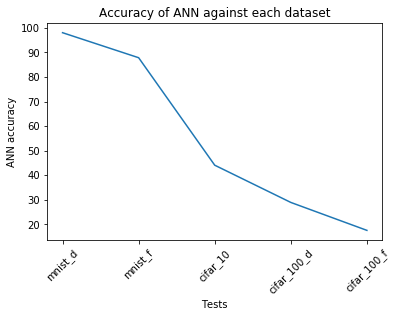

In [79]:
    ann = [98.06,87.86,44.04,28.86,17.47]
    cnn = [99.43,92.48,79.08,57.69,46.79]
    x = [0,1,2,3,4]
    tests = ["mnist_d","mnist_f","cifar_10","cifar_100_d","cifar_100_f"]
    %matplotlib inline
    plt.xticks(x,tests)
    plt.xticks(range(len(tests)),tests,rotation=45)
    
    
    plt.xlabel('Tests')
    plt.ylabel('ANN accuracy')
    plt.title('Accuracy of ANN against each dataset')
    
    plt.plot(x,ann)
    plt.show()

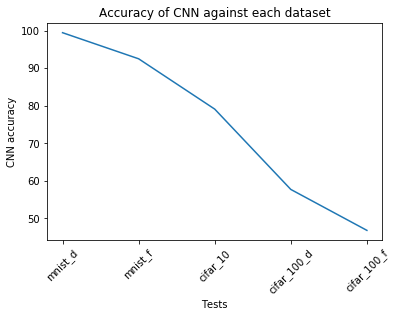

In [82]:
    x = [0,1,2,3,4]
    tests = ["mnist_d","mnist_f","cifar_10","cifar_100_d","cifar_100_f"]
    
    plt.xticks(x,tests)
    plt.xticks(range(len(tests)),tests,rotation=45)
    
    
    plt.xlabel('Tests')
    plt.ylabel('CNN accuracy')
    plt.title('Accuracy of CNN against each dataset')
    
    plt.plot(x,cnn)
    plt.show()